In [29]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [30]:
room_temp = ctrl.Antecedent(np.arange(0, 40, 1), "room_temp")
target_temp = ctrl.Antecedent(np.arange(0, 40, 1), "target_temp")
action = ctrl.Consequent(np.arange(-5, 5, 1), "action")

In [31]:
room_temp["very_cold"] = fuzz.trimf(room_temp.universe, [0,0,10])
room_temp["cold"] = fuzz.trimf(room_temp.universe, [5,12.5,20])
room_temp["warm"] = fuzz.trimf(room_temp.universe, [15,22.5,30])
room_temp["hot"] = fuzz.trimf(room_temp.universe, [25,32.5,40])
room_temp["very_hot"] = fuzz.trimf(room_temp.universe, [35,40,40])

In [32]:
target_temp["very_cold"] = fuzz.trimf(target_temp.universe, [0,0,10])
target_temp["cold"] = fuzz.trimf(target_temp.universe, [5,12.5,20])
target_temp["warm"] = fuzz.trimf(target_temp.universe, [15,22.5,30])
target_temp["hot"] = fuzz.trimf(target_temp.universe, [25,32.5,40])
target_temp["very_hot"] = fuzz.trimf(target_temp.universe, [35,40,40])

In [33]:
action["cool"] = fuzz.gaussmf(action.universe, -5, 2)
action["no_changes"] = fuzz.gaussmf(action.universe, 0, 2)
action["heat"] = fuzz.gaussmf(action.universe, 5, 2)

In [34]:
rule01 = ctrl.Rule(target_temp["very_cold"] & room_temp["very_hot"], action["cool"])
rule02 = ctrl.Rule(target_temp["very_cold"] & room_temp["hot"], action["cool"])
rule03 = ctrl.Rule(target_temp["very_cold"] & room_temp["warm"], action["cool"])
rule04 = ctrl.Rule(target_temp["very_cold"] & room_temp["cold"], action["cool"])
rule05 = ctrl.Rule(target_temp["very_cold"] & room_temp["very_cold"], action["no_changes"])

In [35]:
rule11 = ctrl.Rule(target_temp["cold"] & room_temp["very_hot"], action["cool"])
rule12 = ctrl.Rule(target_temp["cold"] & room_temp["hot"], action["cool"])
rule13 = ctrl.Rule(target_temp["cold"] & room_temp["warm"], action["cool"])
rule14 = ctrl.Rule(target_temp["cold"] & room_temp["cold"], action["no_changes"])
rule15 = ctrl.Rule(target_temp["cold"] & room_temp["very_cold"], action["heat"])

In [36]:
rule21 = ctrl.Rule(target_temp["warm"] & room_temp["very_hot"], action["cool"])
rule22 = ctrl.Rule(target_temp["warm"] & room_temp["hot"], action["cool"])
rule23 = ctrl.Rule(target_temp["warm"] & room_temp["warm"], action["no_changes"])
rule24 = ctrl.Rule(target_temp["warm"] & room_temp["cold"], action["heat"])
rule25 = ctrl.Rule(target_temp["warm"] & room_temp["very_cold"], action["heat"])

In [37]:
rule31 = ctrl.Rule(target_temp["hot"] & room_temp["very_hot"], action["cool"])
rule32 = ctrl.Rule(target_temp["hot"] & room_temp["hot"], action["no_changes"])
rule33 = ctrl.Rule(target_temp["hot"] & room_temp["warm"], action["heat"])
rule34 = ctrl.Rule(target_temp["hot"] & room_temp["cold"], action["heat"])
rule35 = ctrl.Rule(target_temp["hot"] & room_temp["very_cold"], action["heat"])

In [38]:
rule41 = ctrl.Rule(target_temp["very_hot"] & room_temp["very_hot"], action["no_changes"])
rule42 = ctrl.Rule(target_temp["very_hot"] & room_temp["hot"], action["heat"])
rule43 = ctrl.Rule(target_temp["very_hot"] & room_temp["warm"], action["heat"])
rule44 = ctrl.Rule(target_temp["very_hot"] & room_temp["cold"], action["heat"])
rule45 = ctrl.Rule(target_temp["very_hot"] & room_temp["very_cold"], action["heat"])

In [39]:
actions_ctrl = ctrl.ControlSystem([rule01, rule02, rule03, rule04, rule05,
                                   rule11, rule12, rule13, rule14, rule15,
                                   rule21, rule22, rule23, rule24, rule25,
                                   rule31, rule32, rule33, rule34, rule35,
                                   rule41, rule42, rule43, rule44, rule45])

-3.208190785860808


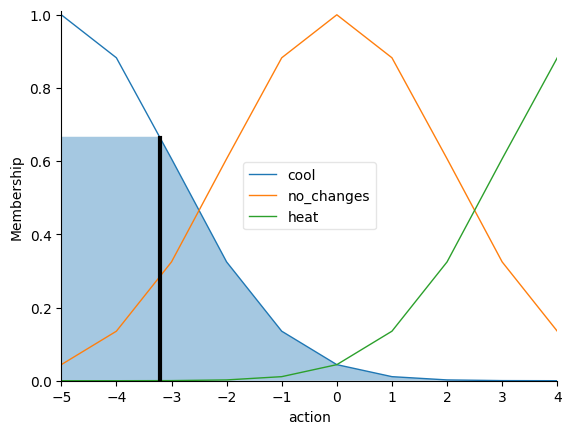

In [40]:
act = ctrl.ControlSystemSimulation(actions_ctrl)

act.input["target_temp"] = 15
act.input["room_temp"] = 20

act.compute()

print(act.output["action"])
action.view(sim = act)